# Исследование данных о продажах игр в интернет-магазине "Стримчик"

**Описание проекта**  

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).   
  
В анализе представлены данные из открытых источников до декабря 2016 года, данные неполные.

Представлены данные о продажах в Северной Америке, Европе, Японии и других странах.

**Цель: определить потенциально популярный продукт для определения дальнейшей рекламной кампаний.**

Задачи данного проекта:
1. открыть файл с данными
2. подготовить данные
3. ислледовательский анализ данных
4. составить портрет пользователя каждого региона
5. проверить гипотезы
6. написать общий вывод

#### Задача 1. Открыть файл с данными

In [ ]:
#Импортируем базы данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy import stats
from scipy.stats import ttest_ind

In [ ]:
#загружаем базы данных
df=pd.read_csv('/datasets/games.csv')

#Выведем 1% строк. Посмотрим какие значения выводятся
display(df.sample(frac=0.01))

#Также выведем информацию о типе данных
df.info()

#Проверим на явные дубликаты
full_duplicates = df[df.duplicated(keep=False)]

# Выведем количество и сами дубликаты (если есть)
print(f"Количество полных дубликатов: {len(full_duplicates)}")

#Проверим пропущенные значения
missing_values = df.isnull().sum()
display(missing_values)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10115,J-League Winning Eleven 9: Asia Championship,PS2,2005.0,Sports,0.00,0.00,0.11,0.00,NaN,NaN,NaN
1929,MySims Agents,DS,2009.0,Adventure,0.54,0.42,0.00,0.11,60.0,tbd,E
7301,The Dukes of Hazzard: Return of the General Lee,PS2,2004.0,Racing,0.11,0.08,0.00,0.03,52.0,6.8,E
8427,Super Power League,SNES,1993.0,Sports,0.00,0.00,0.17,0.00,NaN,NaN,NaN
13870,The Chase: Felix Meets Felicity,DS,2009.0,Action,0.04,0.00,0.00,0.00,59.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
8996,L.A. Rush,XB,2005.0,Racing,0.11,0.03,0.00,0.01,59.0,3,T
12024,Damnation,X360,2009.0,Shooter,0.06,0.01,0.00,0.01,36.0,5.6,M
1088,Tony Hawk's Pro Skater 3,PS,2001.0,Sports,1.09,0.49,0.02,0.07,87.0,8.3,E
8459,Parodius,SAT,1995.0,Shooter,0.00,0.00,0.16,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Количество полных дубликатов: 0


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

***Вывод***   
Загружена 1 датабаза. база состоит из 167 строк и 11 колонок. Количество полных дубликатов - 0.
  
  Name — название игры, 2 пропущенных значения  
  Platform — платформа, 0 пропущенных значений   
  Year_of_Release — год выпуска, 269 пропущенных значений  
  Genre — жанр игры, 2 пропущенных значения   
  NA_sales — продажи в Северной Америке (миллионы проданных копий), 0 пропущенных значений  
  EU_sales — продажи в Европе (миллионы проданных копий), 0 пропущенных значений  
  JP_sales — продажи в Японии (миллионы проданных копий), 0 пропущенных значений  
  Other_sales — продажи в других странах (миллионы проданных копий), 0 пропущенных значений  
  Critic_Score — оценка критиков (максимум 100), 8578 пропущенных значений  
  User_Score — оценка пользователей (максимум 10), 6701 пропущенных значений  
  Rating — рейтинг от организации ESRB, 6766 пропущенных значений


#### Задача 2. Подготовить данные

Name — название игры (object - str в pandas)  
Platform — платформа (object - str в pandas).Нужно посмотреть сколько жанров, можем ли мы поменять на category.    
Year_of_Release — год выпуска (float64). Посмотрим, можем ли мы исправить на int64 - целое число.  
Genre — жанр игры (object - str в pandas). Нужно посмотреть сколько жанров, можем ли мы поменять на category.  
NA_sales — продажи в Северной Америке (миллионы проданных копий)(float64)  
EU_sales — продажи в Европе (миллионы проданных копий)(float64)  
JP_sales — продажи в Японии (миллионы проданных копий)(float64)  
Other_sales — продажи в других странах (миллионы проданных копий)(float64)  
Critic_Score — оценка критиков (максимум 100) (float64)  
User_Score — оценка пользователей (максимум 10) (object - str в pandas).Нужно посмотреть сколько жанров, можем ли мы поменять на category.  
Rating — рейтинг от организации ESRB. (object - str в pandas).Нужно посмотреть сколько жанров, можем ли мы поменять на float64, в каком формате представлены данные по оценке.

In [ ]:
#Приведем название колонок к нижнему регистру, чтобы минимизировать ошибки при обращении к столбцу
df.columns = df.columns.str.lower()

#Разберемся типом данных для platform, genre, user_score, rating,year_of_release

print("  ")
print("="*60)
print("platform")
print("="*60)
print(f"Количество уникальных значений в 'platform':{df['platform'].nunique()}")

#Приведем 'platform' к нижнему регистру, чтобы минимизировать ошибки при обращении к столбцу
df['platform'] = df['platform'].str.lower()

#Оставим тип данных
print(df['platform'].unique())
#-------------------------------------------

print("  ")
print("="*60)
print("genre")
print("="*60)

#В данных присутвует 2 пропуска,мы их удалим
df = df.dropna(subset=['genre'])

#Приведем 'genre' к нижнему регистру, чтобы минимизировать ошибки при обращении к столбцу
df['genre'] = df['genre'].str.lower()

#Выведем количество уникальных значений и их обозначение
print(f"Количество уникальных значений в 'genre':{df['genre'].nunique()}")

#Значений 12, данную колонку мы приведем к типу данных category
df['genre'] = df['genre'].astype('category')

print(df['genre'].unique())

#-------------------------------------------

print("  ")
print("="*60)
print("user_score")
print("="*60)
print(f"Количество уникальных значений в 'user_score':{df['user_score'].nunique()}")

#Присутствует значение 'tbd' (To Be Determined), заменим его на nan, чтобы потом удалить
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan


#Поменяем тип данных на 'float64'
df['user_score'] = df['user_score'].astype('float64')
#Какие-либо действия с пропущенными данными nan мы совершать не будем.
#Удалить не сможем, так как потеряем много данных.
#Заменить медианой или средним, основываясь на имеющихся данных сейчас считаем некорректным.

print(df['user_score'].unique())

#-------------------------------------------

print("  ")
print("="*60)
print("rating")
print("="*60)

print(f"Количество уникальных значений в 'rating':{df['rating'].nunique()}")

#Приведем 'platform' к нижнему регистру, чтобы минимизировать ошибки при обращении к столбцу
df['rating'] = df['rating'].str.lower()

#Значений 6701, данную колонку мы приведем к типу данных category
df['rating'] = df['rating'].astype('category')

#Какие-либо действия с пропущенными данными nan мы совершать не будем.
#Удалить не сможем, так как потеряем много данных.
#Заменить медианой или средним, основываясь на имеющихся данных сейчас считаем некорректным.
print(df['rating'].unique())

#-------------------------------------------


  
platform
Количество уникальных значений в 'platform':31
['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']
  
genre
Количество уникальных значений в 'genre':12
['sports', 'platform', 'racing', 'role-playing', 'puzzle', ..., 'simulation', 'action', 'fighting', 'adventure', 'strategy']
Length: 12
Categories (12, object): ['sports', 'platform', 'racing', 'role-playing', ..., 'action', 'fighting', 'adventure', 'strategy']
  
user_score
Количество уникальных значений в 'user_score':96
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.

In [ ]:
print("  ")
print("="*60)
print("year_of_release")
print("="*60)
#print(f"Количество уникальных значений в 'year_of_release':{df['year_of_release'].nunique()}")


#Попробуем посмотреть данные, которые направили на удаление
#Выведем еще раз количество пропущенных значений
print(df['year_of_release'].isna().sum())
#Посмотрим сколько там уникальных значений
df[df['year_of_release'].isna()]['name'].nunique()

#Посмотри их распределение по платформам
missing_years_by_platform = df[df['year_of_release'].isna()]['platform'].value_counts()
print(missing_years_by_platform)


  
year_of_release
269
wii     34
ps2     34
x360    30
ds      30
ps3     25
xb      21
2600    17
pc      17
psp     16
gc      14
gba     11
3ds      8
ps       7
n64      3
gb       1
psv      1
Name: platform, dtype: int64


In [ ]:
#В переменной 'year_of_release' найдено было 269 пропущенных значения. Удалим эти значения.
df = df.dropna(subset=['year_of_release'])

#Поменяем тип данных на 'Int64, так как это целые числа
df['year_of_release'] = df['year_of_release'].astype('Int64')

print(df['year_of_release'].unique())

#-------------------------------------------

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 37, dtype: Int64


In [ ]:
#Перейдем к обработке других колонок

print("  ")
print("="*60)
print("name")
print("="*60)
print(df['name'].unique())

#В переменной 'name' найдено было 2 пропущенных значения. Удалим эти значения.
df = df.dropna(subset=['name'])

#Удалим лишние точки
df['name'] = df['name'].str.replace('.', '', regex=False)

#Приведём значения к нижнему регистру и уберём лишние пробелы
df['name'] = df['name'].str.lower().str.strip()

#В переменной na_sales, eu_sales, p_sales, other_sales найдено было 0 пропущенных значений



  
name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


In [ ]:
#-------------------------------------------
print("  ")
print("="*60)
print("critic_score")
print("="*60)
#8578 пропущенных значений.Оставим эти пропуски, ничего с ними делать пока не будем
print(df['critic_score'].unique())
print(f"Количество уникальных значений в 'critic_score':{df['critic_score'].nunique()}")

print("  ")
print("="*60)

df.info()


  
critic_score
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
Количество уникальных значений в 'critic_score':81
  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  Int64   
 3   genre            16444 non-null  category
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score

In [ ]:
# Считаем количество строк на каждую комбинацию name, platform, year_of_release
duplicate_groups = df.groupby(['name', 'platform', 'year_of_release']).size().reset_index(name='count')

# Оставляем только те, где больше одной записи (то есть потенциальные неполные дубликаты)
potential_duplicates = duplicate_groups[duplicate_groups['count'] > 1]

partial_duplicates = df.merge(potential_duplicates, on=['name', 'platform', 'year_of_release'], how='inner')

# Удалим неполные дубликаты
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

# Проверим, остались ли ещё дубликаты
duplicate_groups = df.groupby(['name', 'platform', 'year_of_release']).size().reset_index(name='count')


In [ ]:
# Проверка: остались ли дубликаты по основным полям
remaining_duplicates = (
    df.duplicated(subset=['name', 'platform', 'year_of_release', 'genre', 'rating', 'user_score', 'critic_score']).sum())
print(f"Количество оставшихся полных дубликатов: {remaining_duplicates}")


Количество оставшихся полных дубликатов: 0


Вывод:
В результате проведения предобработки данных полные дубликаты не было обнаружено. Было обнаружено и удалено 2 неполных дубликата по сумме параметров:['name', 'platform', 'year_of_release']. Для колонок platform, genre, user_score, rating,year_of_release были изменены типы данных для удобства последующе обработки.

#### Задача 3. Исследовательский анализ данных

***3.1. Проанализируем, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?***

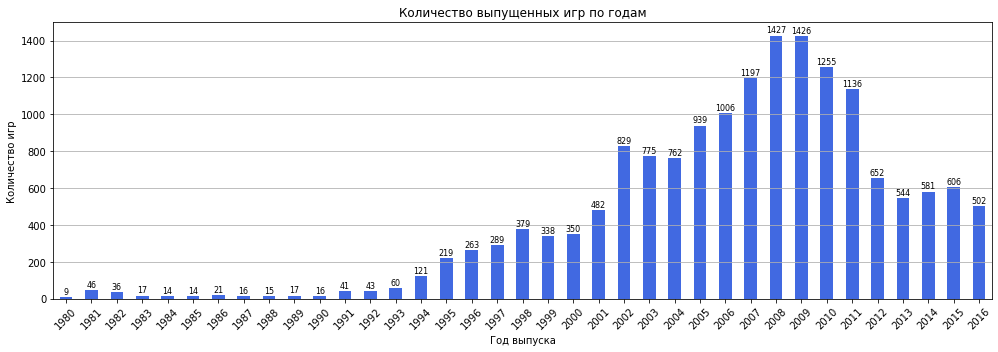

In [ ]:
# Группировка по годам выпуска
games_per_year = df['year_of_release'].value_counts().sort_index()

# Построим график
plt.figure(figsize=(14, 5))
ax = games_per_year.plot(kind='bar', color='royalblue')

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Добавим подписи на столбцы
for idx, value in enumerate(games_per_year):
    ax.text(idx, value + 5, str(value), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Вывод:
По данным, полученным в результате построения графика можно отметить, что в периоды с 1980 года по 1993 год, было выпущено от 9 до 60 игр. С 1991 по 1998 можно наблюдать значительное увеличение количства игр. в 1999 и 2000 опять произошел спад. Максимального значения в количестве выпущенных игр было достигнуто в 2008 году и составило 1427 компьютерных игр. В последующие годы с 2009 пр 2016 год наблюдается спад, колиество игр было в диапазоне от 502 до 1426.

Данные по годам, конечно информативны для понимания тенденции развития рынка компьютерных игр, однако, не все выпускаемые игры пользуются популярностью у покупателей.
Но, благодаря уже имеющимся данным о дате выхода той или иной игры можно делать тематические дни, посвященные выпуску той или иной игры.

***3.2.Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?***

In [ ]:
print("Минимальный и максимальный год в выборке:", df['year_of_release'].min(), df['year_of_release'].max())
#Сверим информацию с интенетом, действительно это выброс, платформа была запущена в 2004 году.
# Выводим строки, где platform = 'ds' и year_of_release = 1085
df[(df['platform'] == 'ds') & (df['year_of_release'] == 2005)]
#Нашли данные, которые выбиваются, изменим там год выхода игры
# Заменим год 1085 на 2005 для платформы ds
df.loc[(df['platform'] == 'ds') & (df['year_of_release'] == 1985), 'year_of_release'] = 2005

Минимальный и максимальный год в выборке: 1980 2016


ТОП-10 платформ по глобальным продажам:
platform
ps2     1233.56
x360     961.24
ps3      931.33
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
Name: total_sales, dtype: float64


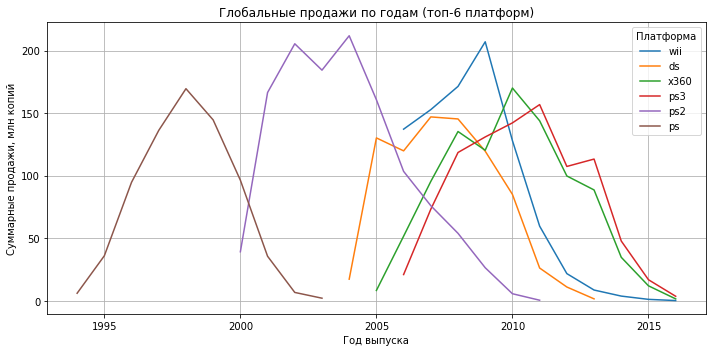

,platform,start_year,end_year,lifespan_years
0,ps,1994,2003,10
1,ps2,2000,2011,12
2,ds,2004,2013,10
3,x360,2005,2016,12
4,ps3,2006,2016,11
5,wii,2006,2016,11


In [ ]:
#Добавляем столбец total_sales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

#Посмотрим как менялись продажи по 6- ти платформам
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(6).index.tolist()
print("ТОП-10 платформ по глобальным продажам:")
print(platform_sales.head(10))

#Оставим первые 6 платформ, так как уже для 7 платформы значения с 6 сильно расходятся
# Убедимся, что тип года корректен
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Обновим список топ-6 платформ
top_platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

# Фильтруем по платформам
df_top = df[df['platform'].isin(top_platforms)]

# Построим график
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_top,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    estimator='sum',
    ci=None
)

plt.title('Глобальные продажи по годам (топ-6 платформ)')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн копий')
plt.grid(True)
plt.legend(title='Платформа')
plt.tight_layout()
plt.show()

#Выведем таблицу,где будут отражаться дата выхода 1 игры и последней, по данным до 2016 года
#Группировка и расчёт начала/конца/продолжительности
platform_lifecycle = (
    df_top.groupby('platform')['year_of_release']
    .agg(start_year='min', end_year='max')
)
platform_lifecycle['lifespan_years'] = platform_lifecycle['end_year'] - platform_lifecycle['start_year'] + 1

#Сортировка по году начала
platform_lifecycle = platform_lifecycle.sort_values('start_year')

#Вывод
platform_lifecycle.reset_index()


## Вывод:
Нами были оставлены 6 платформ, которые показывали суммарно наибольшие показатели по продажам во всем мире. На грифике глобальных продаж по годам, отображено Суммарные прожажи, в млн. в разные года.
1. PS (PlayStation 1), появился в 1994 году, пик продаж приходится на 1996- 2000 года, спад отмечается с 2000 года. Последняя продажа отмечается в 2003 году.
2. PS 2(PlayStation 2), появился в 2000 году, пик продаж приходится на 2002-2005 год, спад отмечается посде 2005 года, при этом PS 2 является обновленной версией PS. Последняя продажа отмечается в 2011 году.
3. DS (Nintendo DS), появилась в 2004 году, пик продаж приходится на 2005-2009 год, спад отмечается после 2009 года. Последняя продажа отмечается в 2013 году. Платформа существует на рынке 29 лет.
4. PS 3 (PlayStation 3), появился в 2006 году, пик продаж прихотся на 2007-2012 год, спад отмечается после 2012 года.  Последняя продажа отмечается в 2016 году.
5. X360 (Xbox 360), появился в 2005 году, пик продаж приходится на 2007-2011 год, спад отмечается после 2011 года. Появился раньше своего прямого конкурента на 1 год. Последняя продажа отмечается в 2016 году.

***3.3.Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.***

In [ ]:
# Убедимся, что тип года корректен
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Фильтрация данных за последние 3 года (2014–2016)
last_3_years = df[df['year_of_release'].between(2014, 2016)]

# Группировка: суммарные глобальные продажи по платформам
sales_last_3y = (
    last_3_years.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

# Выводим топ
print("Суммарные продажи по платформам (2014–2016):")
print(sales_last_3y)

# Фильтрация за последние 5 лет (2012–2016)
last_5_years = df[df['year_of_release'].between(2012, 2016)]

# Суммарные продажи по платформам
sales_last_5y = (
    last_5_years.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

# Вывод результатов
print("Суммарные глобальные продажи по платформам (2012–2016):")
print(sales_last_5y)


Суммарные продажи по платформам (2014–2016):
platform
ps4     288.15
xone    140.36
3ds      86.68
ps3      68.18
x360     48.22
wiiu     42.98
pc       27.05
psv      22.40
wii       5.07
psp       0.36
Name: total_sales, dtype: float64
Суммарные глобальные продажи по платформам (2012–2016):
platform
ps4     314.14
ps3     288.78
x360    236.54
3ds     194.61
xone    159.32
wiiu     82.19
pc       62.65
psv      49.18
wii      35.37
ds       12.55
psp      11.19
Name: total_sales, dtype: float64


Возьмем данные за последние 3 года, так как нам необходимо дать аналитику на предстоящие периоды, нет особого смысла зарываться в историю. Возьмем данные за 2014-2016 год.

***3.4.-3.5.Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.***

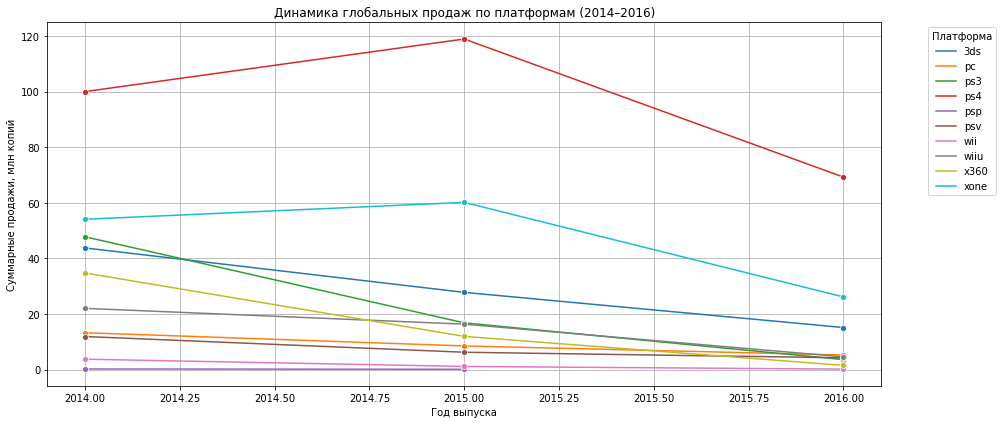

In [ ]:
# Фильтрация по годам
df_filtered = df[df['year_of_release'].between(2014, 2016)]

# Группировка: платформа + год -> сумма продаж
platform_sales = (
    df_filtered
    .groupby(['platform', 'year_of_release'])['total_sales']
    .sum()
    .reset_index()
)

# Построим график
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=platform_sales,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    marker='o'
)

plt.title('Динамика глобальных продаж по платформам (2014–2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн копий')
plt.grid(True)
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


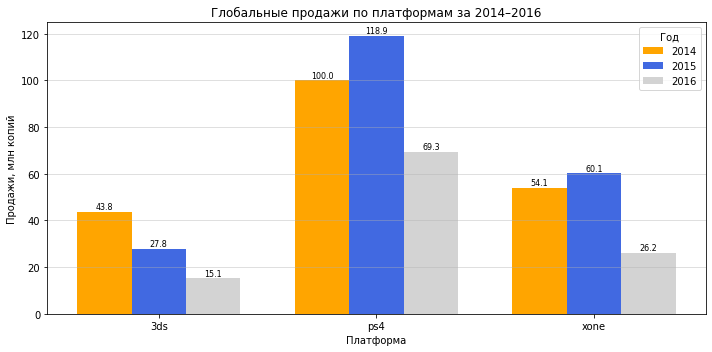

In [ ]:
#Выделим 3 наиболее прибыльные платформы в выбранный актуальный период: 'ps4', 'xone', '3ds'
#Фильтрация
df_filtered = df[
    (df['platform'].isin(['ps4', 'xone', '3ds'])) &
    (df['year_of_release'].between(2014, 2016))
]

#Группируем по платформе и году
platform_year_sales = (
    df_filtered
    .groupby(['platform', 'year_of_release'])['total_sales']
    .sum()
    .unstack(fill_value=0)
)
years = [2014, 2015, 2016]
bar_width = 0.25
positions = np.arange(len(platform_year_sales))

#Цвета
colors = {
    2014: 'orange',
    2015: 'royalblue',
    2016: 'lightgray'
}

#Построение
plt.figure(figsize=(10, 5))

for i, year in enumerate(years):
    values = platform_year_sales[year]
    bars = plt.bar(
        positions + i * bar_width,
        values,
        width=bar_width,
        label=str(year),
        color=colors[year]
    )
    # Добавим подписи
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.3,
                f'{height:.1f}',
                ha='center',
                va='bottom',
                fontsize=8
            )

#Оформление
plt.xticks(positions + bar_width, platform_year_sales.index)
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.title('Глобальные продажи по платформам за 2014–2016')
plt.legend(title='Год')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

Вывод:
По результатам проведенного анализа актуального периода были выявлены 3 наиболее продаваемых платформы:  'ps4' - 288.15 млн., 'xone' - 140.36 млн. и '3ds' - 86.68 млн.. Можно проследить некий тренд, что в 2014 году показатели продажи копий по всем 3-ем продуктам выше, чем в 2016 году.   
В целом тенденция снижения продаж наблюдается для всех платформ.

***3.6.Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.***

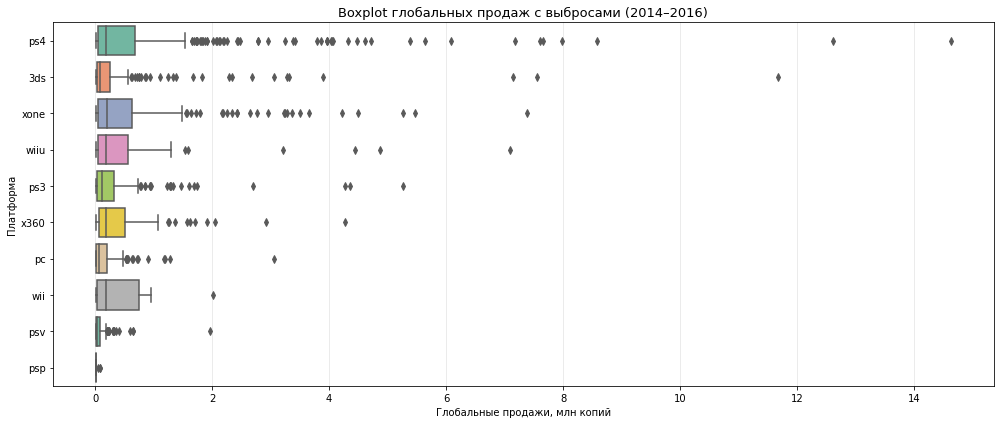

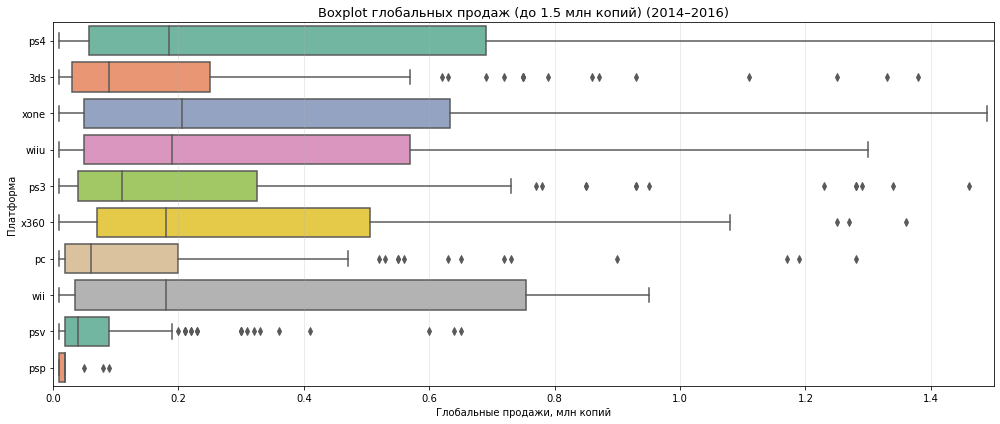

Медианные глобальные продажи (в млн копий):
platform
xone    0.205
wiiu    0.190
ps4     0.185
wii     0.180
x360    0.180
ps3     0.110
3ds     0.090
pc      0.060
psv     0.040
psp     0.020
Name: total_sales, dtype: float64


In [ ]:
#Фильтруем по актуальному периоду
df_box_all = df[df['year_of_release'].between(2014, 2016)].copy()

#График 1
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_box_all, y='platform', x='total_sales', palette='Set2')
plt.title('Boxplot глобальных продаж с выбросами (2014–2016)', fontsize=13)
plt.xlabel('Глобальные продажи, млн копий')
plt.ylabel('Платформа')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#График 2
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_box_all, y='platform', x='total_sales', palette='Set2')
plt.xlim(0, 1.5)  # ограничим масштаб по X
plt.title('Boxplot глобальных продаж (до 1.5 млн копий) (2014–2016)', fontsize=13)
plt.xlabel('Глобальные продажи, млн копий')
plt.ylabel('Платформа')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#Выведем медианы
medians = df_box_all.groupby('platform')['total_sales'].median().sort_values(ascending=False)
print("Медианные глобальные продажи (в млн копий):")
print(medians)


Вывод:
Boxplot продаж за 2014-2016 год  отражает диапазон продаж, включая выбросы, т.е. в данной ситуации - игры, которые особенно хорошо продались.
- PS4, XOne и WiiU имеют самые высокие выбросы — отдельные игры с очень высокими продажами.
- XOne немного лидирует по медиане (0.205 млн копий), но разница с PS4 и WiiU — не слишком отличается.
- Продажи Wii показывают стабильные продажи
- PSV PSP имеют низкую медиану и очень сжатое распределение, что говорит о малом количестве продаж  

Boxplot продаж за 2014-2016 год до 1.5 млн. копий отражает медиану, 75% квантиль и распределение по основной массе игр.(Некоторые выбросы не попали в данный график из-за размера)
- большинство игр на платформах продаются в диапазоне от 0.1 до 0.75 млн. в дианазоне до 75% квантиля.

***3.7.Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.***

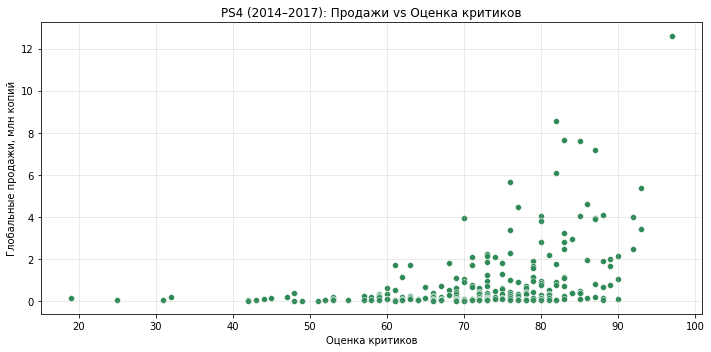

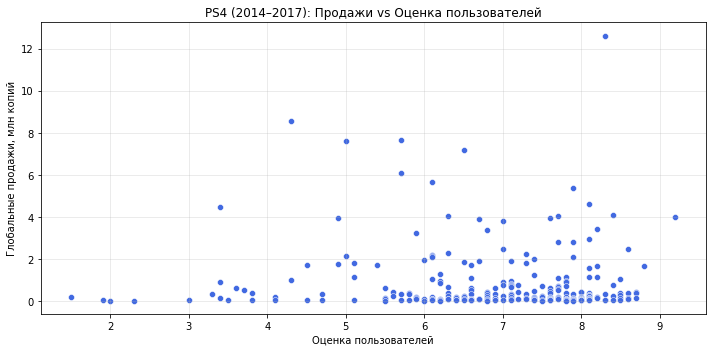

Корреляция (продажи ~ критики): 0.403
Корреляция (продажи ~ пользователи): -0.040


In [ ]:
#Возьмем платформу ps4 в промежутки 2014-2017 года.
df_ps4 = df[
    (df['platform'] == 'ps4') &
    (df['year_of_release'].between(2014, 2017))
].copy()

# Критики
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ps4, x='critic_score', y='total_sales', color='seagreen')
plt.title('PS4 (2014–2017): Продажи vs Оценка критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи, млн копий')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Пользователи
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ps4, x='user_score', y='total_sales', color='royalblue')
plt.title('PS4 (2014–2017): Продажи vs Оценка пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи, млн копий')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


crit_corr = df_ps4['total_sales'].corr(df_ps4['critic_score'])
user_corr = df_ps4['total_sales'].corr(df_ps4['user_score'])

print(f"Корреляция (продажи ~ критики): {crit_corr:.3f}")
print(f"Корреляция (продажи ~ пользователи): {user_corr:.3f}")

Выводы:  
PS4 (2014–2017)  
Умеренная положительная связь с критиками, пользователи почти не влияют

***3.8.Соотнесите выводы с продажами игр на других платформах.***

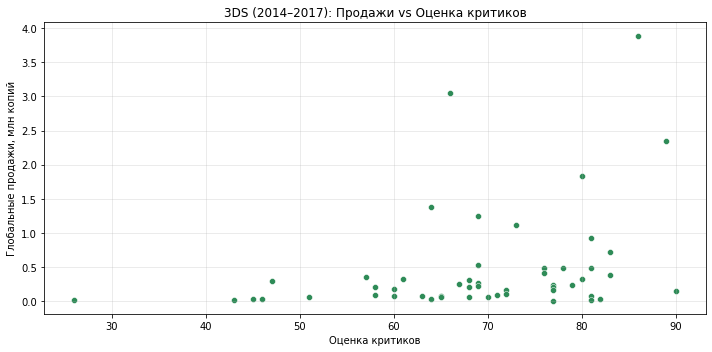

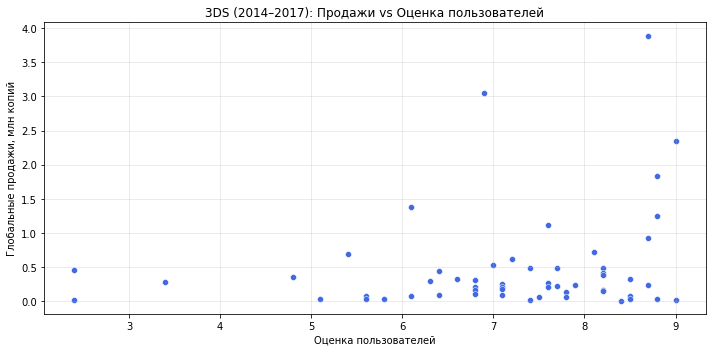

Корреляция (продажи ~ критики): 0.314
Корреляция (продажи ~ пользователи): 0.215


In [ ]:
#Возьмем платформу 3ds в промежутки 2014-2017 года.
df_ps4 = df[
    (df['platform'] == '3ds') &
    (df['year_of_release'].between(2014, 2017))
].copy()



#Критики
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ps4, x='critic_score', y='total_sales', color='seagreen')
plt.title('3DS (2014–2017): Продажи vs Оценка критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи, млн копий')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Пользователи
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ps4, x='user_score', y='total_sales', color='royalblue')
plt.title('3DS (2014–2017): Продажи vs Оценка пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи, млн копий')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


crit_corr = df_ps4['total_sales'].corr(df_ps4['critic_score'])
user_corr = df_ps4['total_sales'].corr(df_ps4['user_score'])

print(f"Корреляция (продажи ~ критики): {crit_corr:.3f}")
print(f"Корреляция (продажи ~ пользователи): {user_corr:.3f}")

Выводы:  
3DS (2014–2017)
  
Оценка критиков умеренно положительно влияют на выбор покупателей.

Оценка пользователей слабая, но все-таки положительная.

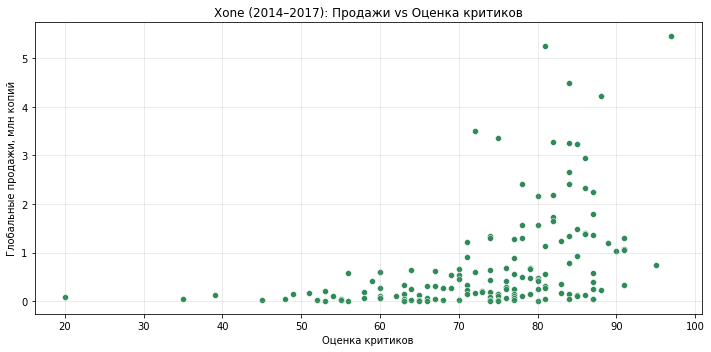

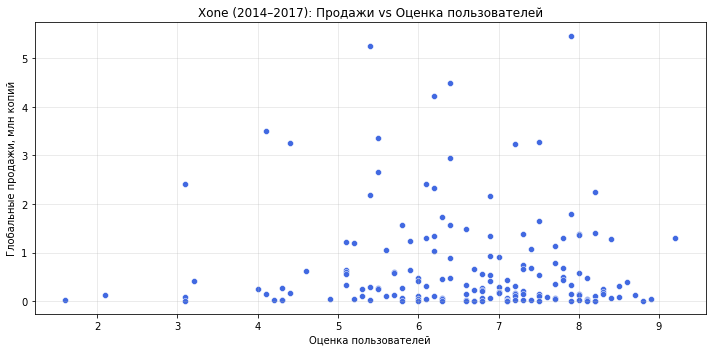

Корреляция (продажи ~ критики): 0.429
Корреляция (продажи ~ пользователи): -0.070


In [ ]:
#Возьмем платформу xone в промежутки 2014-2017 года.
df_ps4 = df[
    (df['platform'] == 'xone') &
    (df['year_of_release'].between(2014, 2017))
].copy()

#Критики
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ps4, x='critic_score', y='total_sales', color='seagreen')
plt.title('Xone (2014–2017): Продажи vs Оценка критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи, млн копий')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Пользователи
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ps4, x='user_score', y='total_sales', color='royalblue')
plt.title('Xone (2014–2017): Продажи vs Оценка пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи, млн копий')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


crit_corr = df_ps4['total_sales'].corr(df_ps4['critic_score'])
user_corr = df_ps4['total_sales'].corr(df_ps4['user_score'])

print(f"Корреляция (продажи ~ критики): {crit_corr:.3f}")
print(f"Корреляция (продажи ~ пользователи): {user_corr:.3f}")

Выводы:  
Xone (2014–2017)  

Критики влияют чуть сильнее, пользователи — отрицательно

***3.9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?***

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />Молодец, развернула график — удобно читать названия жанров,  и отсортировала бары — удобно сравнивать

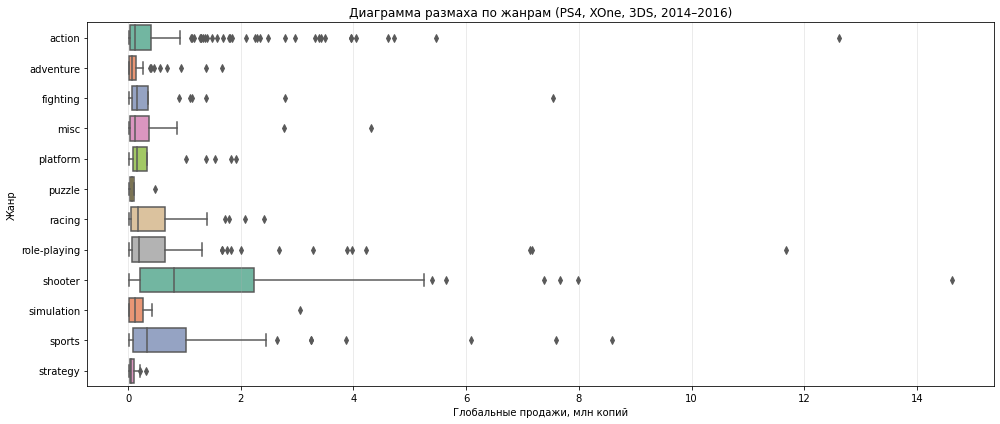

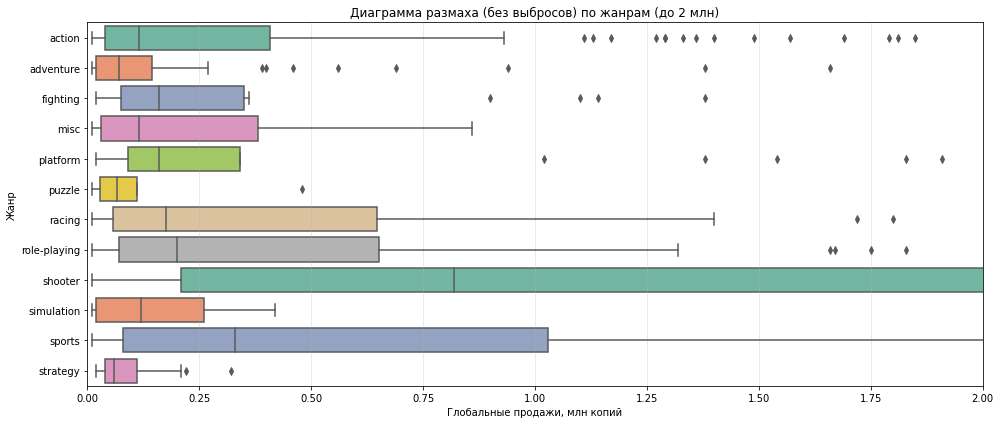

Медианные продажи по жанрам (в млн копий):
genre
shooter         0.820
sports          0.330
role-playing    0.200
racing          0.175
fighting        0.160
platform        0.160
simulation      0.120
action          0.115
misc            0.115
adventure       0.070
puzzle          0.065
strategy        0.060
Name: total_sales, dtype: float64


In [ ]:
# Фильтрация по платформам, годам и удаление пропусков
df_genre_box = df[
    (df['platform'].isin(['ps4', 'xone', '3ds'])) &
    (df['year_of_release'].between(2014, 2016)) &
    (df['genre'].notna()) &
    (df['total_sales'].notna())
].copy()

# Первая диаграмма — полный масштаб (видны выбросы)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_genre_box, x='total_sales', y='genre', palette='Set2')
plt.title('Диаграмма размаха по жанрам (PS4, XOne, 3DS, 2014–2016)')
plt.xlabel('Глобальные продажи, млн копий')
plt.ylabel('Жанр')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Вторая диаграмма — обрезанный масштаб (без выбросов)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_genre_box, x='total_sales', y='genre', palette='Set2')
plt.xlim(0, 2)  # ограничим ось X
plt.title('Диаграмма размаха (без выбросов) по жанрам (до 2 млн)')
plt.xlabel('Глобальные продажи, млн копий')
plt.ylabel('Жанр')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Медианные значения по жанрам
medians = df_genre_box.groupby('genre')['total_sales'].median().sort_values(ascending=False)
print("Медианные продажи по жанрам (в млн копий):")
print(medians)


На основании построенных диаграмм размаха и анализа медианных значений можно выделить следующее:

Среди самых прибыльных жанров можно отметить:

Shooter — жанр, лидирующий по показателям медиане (0.820) и разбросу. Видно, что именно в этом жанре сосредоточено наибольшее количество хитов с высокими продажами. Выбросы — многочисленные, что говорит о потенциально больших продажах единичных игр.

Sports  — устойчиво высокий уровень медианных продаж (0.330) и достаточно широкий IQR, что говорит о большом количестве продаваемых игр.

Role-Playing (0.200) — демонстрирует стабильность и интерес со стороны аудитории, особенно актуален для японского рынка.

Наименьшей привлекательностью для покупателей обладают жанры:

Adventure, Puzzle, Strategy — с медианными значениями ниже 0.07 млн. Несмотря на наличие редких выбросов, в целом данные жанры характеризуются низкой прибылью и слабыми продажами.

Для дальнейшего продвижения наиболее целесообразно рассматривать жанры shooter, sports и role-playing. Они демонстрируют наивысшие медианные значения, стабильные продажи и высокую вероятность выпуска прибыльных проектов. При этом жанры с низкими медианами стоит включать в рекламную стратегию избирательно, лишь при наличии признаков уникальности или узнаваемости бренда.

#### Задача 4. Составьте портрет пользователя каждого региона

Задание:  
Определите для пользователя каждого региона (NA, EU, JP):  
4.1.Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
4.2.Самые популярные жанры (топ-5). Поясните разницу.  
4.3.Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
#4.1.Самые популярные платформы (топ-5). Опишите различия в долях продаж.
#Сделаем выборку
df_new = df[df['year_of_release'].between(2014, 2016)]


Топ-5 платформ + others в регионе Северная Америка:

ps4: 98.61 млн (34.71%)
xone: 81.27 млн (28.61%)
x360: 28.30 млн (9.96%)
3ds: 22.64 млн (7.97%)
ps3: 22.05 млн (7.76%)
others: 31.19 млн (10.98%)

Топ-5 платформ + others в регионе Европа:

ps4: 130.04 млн (48.04%)
xone: 46.25 млн (17.09%)
ps3: 25.54 млн (9.44%)
pc: 17.97 млн (6.64%)
3ds: 16.12 млн (5.96%)
others: 34.76 млн (12.84%)

Топ-5 платформ + others в регионе Япония:

3ds: 44.24 млн (47.52%)
ps4: 15.02 млн (16.13%)
psv: 14.54 млн (15.62%)
ps3: 11.22 млн (12.05%)
wiiu: 7.31 млн (7.85%)
others: 0.76 млн (0.82%)


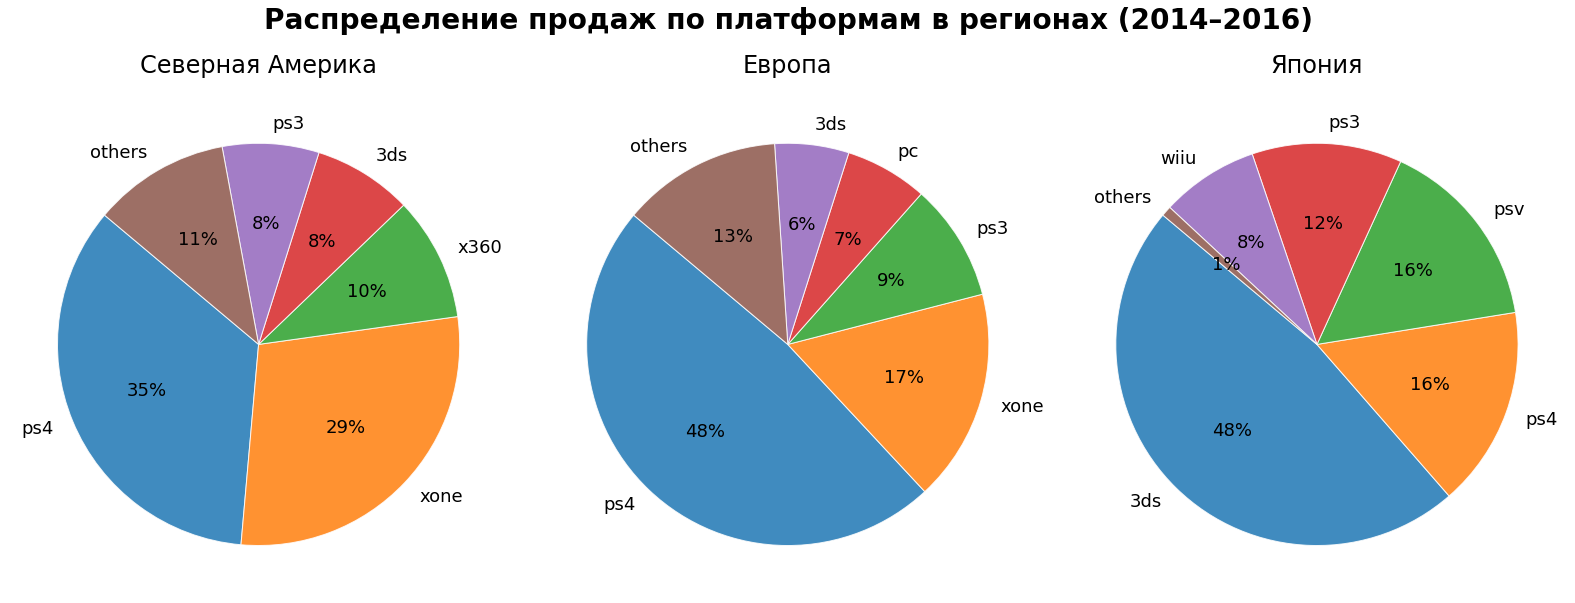

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Фильтрация по нужному периоду
df_filtered = df[df['year_of_release'].between(2014, 2016)].copy()

# Универсальная функция для получения топ-5 + others
def prepare_region_data(df, region_col, region_name):
    region_sales = df.groupby('platform')[region_col].sum()
    top5 = region_sales.sort_values(ascending=False).head(5)
    others = region_sales.drop(top5.index).sum()
    combined = pd.concat([top5, pd.Series({'others': others})])

    # Печать
    print(f"\nТоп-5 платформ + others в регионе {region_name}:\n")
    total = combined.sum()
    for platform, sales in combined.items():
        share = round(sales / total * 100, 2)
        print(f"{platform}: {sales:.2f} млн ({share}%)")

    return combined

# Получаем данные для каждого региона
top_na = prepare_region_data(df_filtered, 'na_sales', 'Северная Америка')
top_eu = prepare_region_data(df_filtered, 'eu_sales', 'Европа')
top_jp = prepare_region_data(df_filtered, 'jp_sales', 'Япония')

# Готовим данные для графиков
sales_data = [top_na, top_eu, top_jp]
regions = ['Северная Америка', 'Европа', 'Япония']

# Функция для отображения процентов
def make_autopct(values):
    def my_autopct(pct):
        return f'{int(round(pct))}%'
    return my_autopct

# Построение графиков
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

for i, ax in enumerate(axes):
    wedges, texts, autotexts = ax.pie(
        sales_data[i],
        labels=sales_data[i].index,
        autopct=make_autopct(sales_data[i]),
        startangle=140,
        textprops={'fontsize': 18},
        wedgeprops={'edgecolor': 'white', 'linewidth': 1, 'alpha': 0.85}
    )
    for text in texts + autotexts:
        text.set_fontsize(18)
    ax.set_title(regions[i], fontsize=24, pad=20)

plt.suptitle('Распределение продаж по платформам в регионах (2014–2016)', fontsize=28, weight='bold', y=1.05)
plt.tight_layout()
plt.show()


Вывод:  
Портрет пользователя по региону Северная Америка:
Большую часть рынка занимает PS4 — 34.7% от всех продаж. Второе место XOne (28.6%). Приблизительно одинаковую долю занимают 3DS, X360, PS3 и другие платформы, объединенные в ячейку others.  

Что касается Европы:
Лидер - PS4 — 48.0%, почти половина всего рынка, следующий XOne — 17.1%. PS3, X360, 3DS всё ещё востребованы, занимая заметные доли.Доля прочих платформ (others) составляет 13.8%.  

Япония:
Лидер -3DS — 47.5% почти половина всего рынка, следующий PS4 и PS3 также уверенно представлены. Высокая доля прочих платформ — 23.9%, что отражает разнообразие интересов (например, PSP, PSVita и т.п.).  
Японский рынок ориентирован на портативные консоли.

In [ ]:
# check
df[df['year_of_release'].between(2014, 2016)].groupby('platform').agg({'jp_sales':'sum'
                                                        }).sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31
psp,0.36
xone,0.32
x360,0.08
pc,0.00


***4.2.Определите для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясните разницу.***


Топ-5 жанров в регионе Северная Америка:

shooter: 79.02 млн (27.82%)
action: 72.53 млн (25.53%)
sports: 46.13 млн (16.24%)
role-playing: 33.47 млн (11.78%)
others: 16.69 млн (5.88%)

Топ-5 жанров в регионе Европа:

action: 74.68 млн (27.59%)
shooter: 65.52 млн (24.21%)
sports: 45.73 млн (16.89%)
role-playing: 28.17 млн (10.41%)
others: 22.90 млн (8.46%)

Топ-5 жанров в регионе Япония:

role-playing: 31.16 млн (33.47%)
action: 29.58 млн (31.78%)
others: 10.48 млн (11.26%)
fighting: 6.37 млн (6.84%)
misc: 5.61 млн (6.03%)


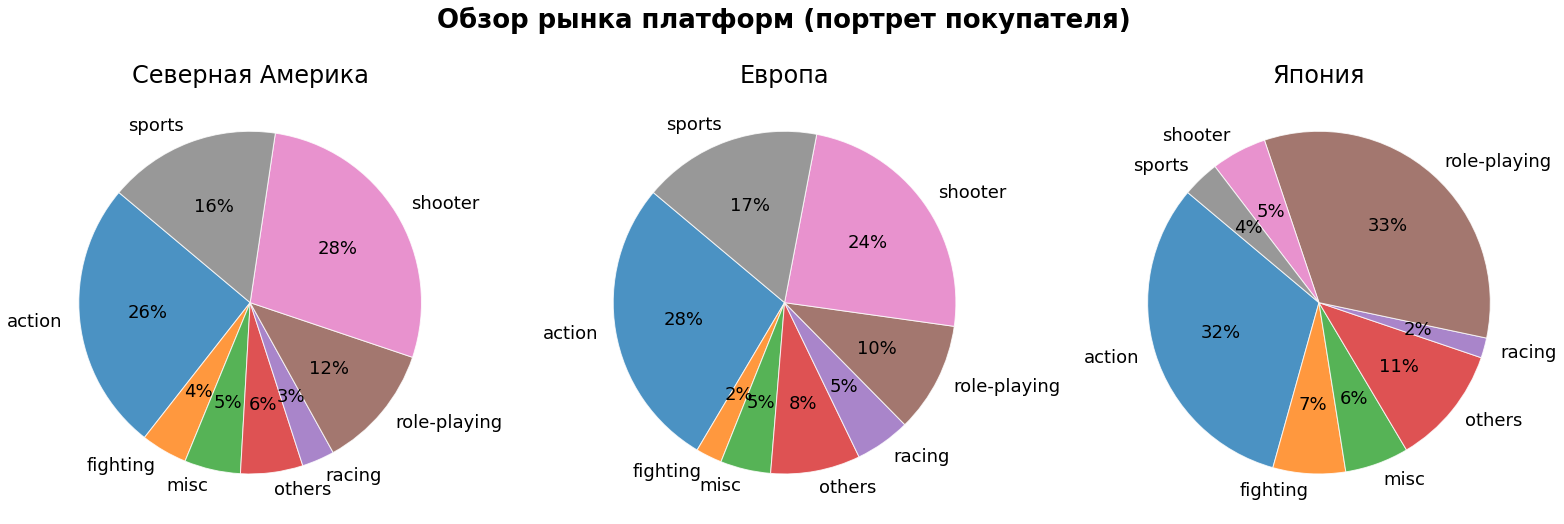

In [ ]:
import matplotlib.pyplot as plt

# Настройки отображения жанров (основные + 'others')
main_genres = ['shooter', 'action', 'sports', 'role-playing', 'misc', 'racing', 'fighting']

# Отбор данных за 2014–2016
df_genres = df[df['year_of_release'].between(2014, 2016)].copy()
df_genres = df_genres.dropna(subset=['genre'])

# Объединяем жанры
df_genres['genre_grouped'] = df_genres['genre'].apply(lambda x: x if x in main_genres else 'others')

# Группируем продажи по жанрам и регионам
genre_sales = df_genres.groupby('genre_grouped')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Подсчёт общих продаж по регионам
total_na = genre_sales['na_sales'].sum()
total_eu = genre_sales['eu_sales'].sum()
total_jp = genre_sales['jp_sales'].sum()

# Функция форматированного вывода
def print_top_genres(region_name, region_column, total):
    print(f"\nТоп-5 жанров в регионе {region_name}:\n")
    top_genres = genre_sales[region_column].sort_values(ascending=False).head(5)
    for genre, value in top_genres.items():
        share = round(value / total * 100, 2)
        print(f"{genre}: {value:.2f} млн ({share}%)")

# Выводим текстовую информацию
print_top_genres('Северная Америка', 'na_sales', total_na)
print_top_genres('Европа', 'eu_sales', total_eu)
print_top_genres('Япония', 'jp_sales', total_jp)

# Подготовка данных для диаграмм
labels = genre_sales.index.tolist()
na_values = genre_sales['na_sales']
eu_values = genre_sales['eu_sales']
jp_values = genre_sales['jp_sales']
regions = ['Северная Америка', 'Европа', 'Япония']
sales_data = [na_values, eu_values, jp_values]

# Функция отображения процентов
def make_autopct(values):
    def my_autopct(pct):
        return f'{int(round(pct))}%'
    return my_autopct

# Построение pie chart
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

for i, ax in enumerate(axes):
    wedges, texts, autotexts = ax.pie(
        sales_data[i],
        labels=labels,
        autopct=make_autopct(sales_data[i]),
        startangle=140,
        textprops={'fontsize': 18},
        wedgeprops={'edgecolor': 'white', 'linewidth': 1, 'alpha': 0.8}
    )
    for text in autotexts:
        text.set_fontsize(18)
    for text in texts:
        text.set_fontsize(18)
    ax.set_title(regions[i], fontsize=24)

plt.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=26, weight='bold')
plt.tight_layout()
plt.show()


Вывод:  
Обзор рынка платформ в Северной Америке, лидерами является жанры игр shooter (27.82%) и action (25.53%). Также высокий спрос среди жанров sports (16.24%) и role-playing (11.78%).  

На рынке Европы лидирующие позициизанимают action (27.59%) и shooter (24.21%), далее идут sports (16.89%) и role-playing (10.41%), others составляет 8.46%.  

На Японском рынке лидирующую позицию занимает role-playing (33.47%), далее идет fighting (6.84%) и misc (6.03%), категорию others, занимают 11.26%.

***4.3.Определите для пользователя каждого региона (NA, EU, JP):Влияет ли рейтинг ESRB на продажи в отдельном регионе?***

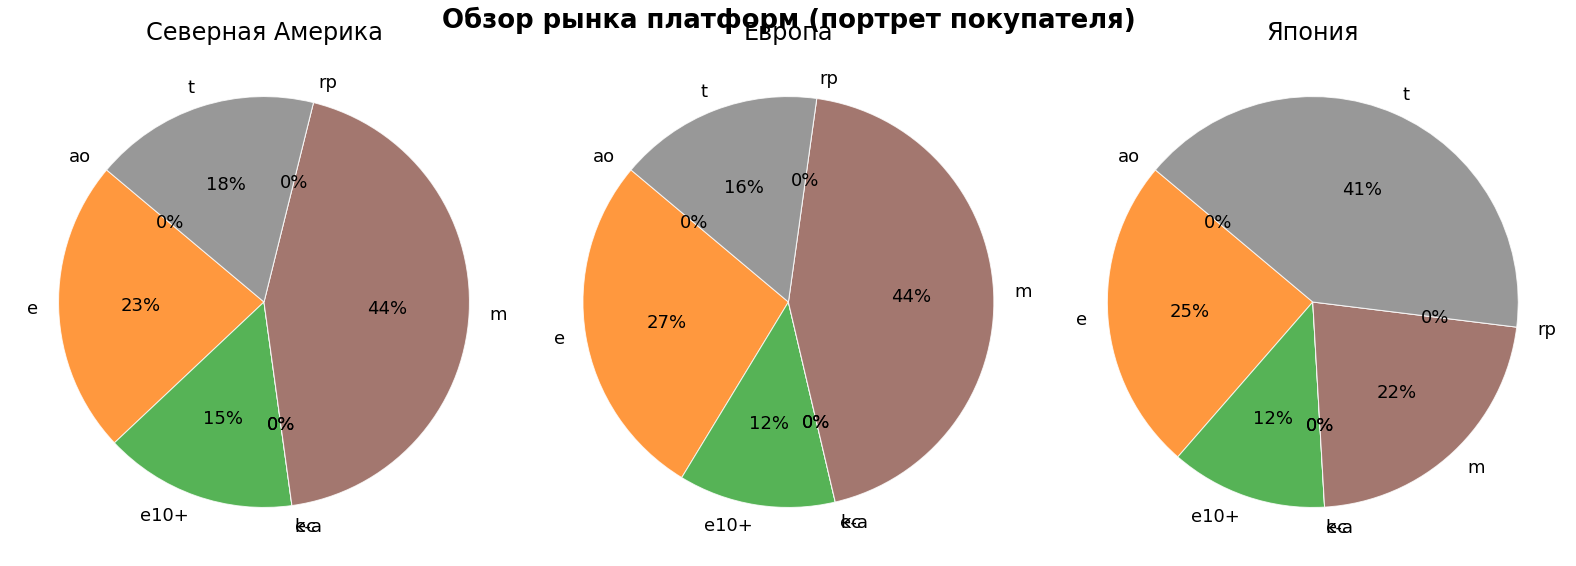

In [ ]:
import matplotlib.pyplot as plt

# Группируем и суммируем продажи по рейтингу
rating_sales = df[
    (df['year_of_release'].between(2014, 2016)) & (df['rating'].notna())
].groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Подготовка данных
labels = rating_sales.index.tolist()
na_values = rating_sales['na_sales']
eu_values = rating_sales['eu_sales']
jp_values = rating_sales['jp_sales']
regions = ['Северная Америка', 'Европа', 'Япония']
sales_data = [na_values, eu_values, jp_values]

# Функция для подписей процентов
def make_autopct(values):
    def my_autopct(pct):
        return f'{int(round(pct))}%'
    return my_autopct

# Построение графиков
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

for i, ax in enumerate(axes):
    wedges, texts, autotexts = ax.pie(
        sales_data[i],
        labels=labels,
        autopct=make_autopct(sales_data[i]),
        startangle=140,
        textprops={'fontsize': 18},
        wedgeprops={'edgecolor': 'white', 'linewidth': 1, 'alpha': 0.8}
    )
    for text in autotexts:
        text.set_fontsize(18)
    for text in texts:
        text.set_fontsize(18)
    ax.set_title(regions[i], fontsize=24)

plt.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=26, weight='bold')
plt.tight_layout()
plt.show()


Вывод:  
В Северной Америке рейтинг m (от 17 лет) имеет наибольшую долю продаж (43.96%),что указывает на доминирование взрослой аудитории и высокую популярность "взрослых" жанров — шутеров, экшенов, RPG. ESRB-рейтинг существенно влияет на продажи в этом регионе.  

Как и в Северной Америке, m-рейтинг занимает лидирующую позицию (44.13%).
Игры, рассчитанные на взрослую аудиторию, пользуются высоким спросом. Рейтинги ESRB влияют на структуру продаж.  

В Японии ситуация отличается. Игры с рейтингом t (40.84%) лидируют, а продажи e-рейтинга (24.7%) заметно ниже, чем в западных регионах. Игроки отдают предпочтение менее агрессивным и более сюжетным играм, что типично для японского рынка.Рейтинг ESRB также влияет на спрос, но в ином направлении.

#### Задача 5. Проверьте гипотезы

5.1. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  в период с 2014-2016 год
5.1.1. Постановка гипотез.  
В качестве (нулевой гипотезы) H0: Средние пользовательские рейтинги Xbox One и PC равны в период 2014-2016 год
Альтернативная гипотеза H1:Средние пользовательские рейтинги отличаются в период 2014-2016 год
  
Тип выборок: независимые.
Применим t-критерий Стьюдента для независимых выборок: scipy.stats.ttest_ind()
α = 0.05, мы готовы принять 5% риск, что результат, который мы посчитали "значимым", — на самом деле случайность.

In [ ]:
# Ограничиваем актуальный период
df_filtered = df[
    df['year_of_release'].between(2014, 2016) &
    df['user_score'].notna()
].copy()

# Приводим тип к числовому
df_filtered['user_score'] = df_filtered['user_score'].astype('float')

# Отбираем оценки пользователей
xone_scores = df_filtered[df_filtered['platform'] == 'xone']['user_score']
pc_scores = df_filtered[df_filtered['platform'] == 'pc']['user_score']

# Порог значимости
alpha = 0.05

# t-тест
results = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print(f"p-значение: {results.pvalue:.5f}")


p-значение: 0.11601


H0: Средние пользовательские рейтинги Xbox One и PC равны  
p-значение: 0.05 < 0.11601 (уровень значимости α = 0.05)  
Так как p-значение больше уровня значимости (0.116 > 0.05), нет оснований отвергать нулевую гипотезу.
На основе данных за период 2014–2016 нет статистически значимых различий между средними пользовательскими оценками игр на платформах Xbox One и PC. Это означает, что в рассматриваемый период пользователи в среднем оценивали игры на обеих платформах похожим образом.

5.1.2.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В качестве (нулевой гипотезы) H0: Средние пользовательские рейтинги жанров Action и Sports равны  в период 2014-2016 год
Альтернативная гипотеза H1:Средние пользовательские рейтинги жанров Action и Sports различаются  в период 2014-2016 год  

Тип выборок: независимые. Применим t-критерий Стьюдента для независимых выборок: scipy.stats.ttest_ind() α = 0.05, мы готовы принять 5% риск, что результат, который мы посчитали "значимым", — на самом деле случайность.

In [ ]:
# Отбор данных за нужный период и непустыми user_score
df_period = df[(df['year_of_release'].between(2014, 2016)) & (df['user_score'].notna())]

# Отбор оценок по жанрам
action_scores = df_period[df_period['genre'] == 'action']['user_score'].astype('float')
sports_scores = df_period[df_period['genre'] == 'sports']['user_score'].astype('float')

# Порог значимости
alpha = 0.05

# Применим t-тест
stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"p-значение: {p_value:.5f}")

p-значение: 0.00000


Так как p-значение 0.00000 < 0.05, мы отвергаем нулевую гипотезу.

Существует статистически значимая разница между средними пользовательскими рейтингами жанров Action и Sports в период с 2014 по 2016 год.

In [ ]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = stats.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Вывод:    
Нами была выдвинута гипотеза, что "Средние пользовательские рейтинги Xbox One и PC равны в период 2014-2016 год". Статистически значимой разницы между пользовательскими рейтингами игр на Xbox One и PC не обнаружено (в период 2014–2016 гг.). Игроки в среднем оценивают игры на обеих платформах похоже.  
существует статистически значимая разница между пользовательскими рейтингами жанров Action и Sports в период с 2014 по 2016 год.  
  
В следующем задание нами была выдвинута гипотеза, что "Средние пользовательские рейтинги жанров Action и Sports равны в период 2014-2016 год"
Игры жанра Action в среднем оцениваются по-другому, чем игры жанра Sports (скорее всего выше, но это можно дополнительно проверить медианами или средними значениями).

#### Задача 6. Общие выводы.

Нами было проведено исследование данных о продажах игр в интернет-магазине "Стримчик".

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
В анализе представлены данные из открытых источников до 2016 года, данные о продажах в Северной Америке, Европе, Японии и других странах

Цель исследования была: определить потенциально популярный продукт для определения дальнейшей рекламной кампаний.
Задачи данного проекта:
1. открыть файл с данными
2. подготовить данные
3. исследовательский анализ данных
4. составить портрет пользователя каждого региона
5. проверить гипотезы
6. написать общий вывод

1. В результате исследования были проведены все необходимые исследования и выполнены все поставленные задачи.
В рамках первой задачи об открытии файла с данными была проделана следующая работа:  
1.1. были подгружены все необходимые для исследования библиотеки (в процессе исследования они добавлялись).
1.2. был загружен датасет
1.3. произведена проверка на явные дубликаты, которых не было обнаружено
1.4. была проведена проверка на пропущенные значения  

  
2. В рамках второй задачи о подготовке данных к исследованию нами были совершены следующие действия, а именно:
2.1. было проведено преобразования некоторых колонок, где необходимо было поменять тип данных для последующей обработки (platform, genre, user_score, rating, year_of_release)
2.2. названия колонок и данные приведены к нижнему регистру  
2.3. значения nan в колонках, где их было не много, были удалены. В колонках, где было пропущено больше 5000 значений, было оставлено и предоставлены аргументы по данным решениям  
  
    
      
3. В рамках третьей задачи о проведении исследовательского анализа данных были сделаны следующие шаги, а именно:
3.1.были проанализированы количество выпускаемых игр в разные года, результатом данного исследования стало следующие:  в периоды с 1980 года по 1993 год, было выпущено от 9 до 60 игр. С 1991 по 1998 можно наблюдать значительное увеличение количства игр. в 1999 и 2000 опять произошел спад. Максимального значения в количестве выпущенных игр было достигнуто в 2008 году и составило 1427 компьютерных игр. В последующие годы с 2009 пр 2016 год наблюдается спад, колиество игр было в диапазоне от 502 до 1426.
  Имеющие выводы позволят спланировать специальные акции, посвященные датам выхода игр или др.  
  
3.2. были проанализированы изменения на платформах в разные годы, что позволило получить следующие данные:
Было выявлено 6 платформ, суммарные показатели продаж которых показали наибольшее значение.
 На графике глобальных продаж по годам, отображено Суммарные прожажи, в млн. в разные года.

PS (PlayStation 1), появился в 1994 году, пик продаж приходится на 1996- 2000 года, спад отмечается с 2000 года. Последняя продажа отмечается в 2003 году.
PS 2(PlayStation 2), появился в 2000 году, пик продаж приходится на 2002-2005 год, спад отмечается посде 2005 года, при этом PS 2 является обновленной версией PS. Последняя продажа отмечается в 2011 году.
DS (Nintendo DS), появилась в 2004 году, пик продаж приходится на 2005-2009 год, спад отмечается после 2009 года. Последняя продажа отмечается в 2013 году. Платформа существует на рынке 29 лет.
PS 3 (PlayStation 3), появился в 2006 году, пик продаж прихотся на 2007-2012 год, спад отмечается после 2012 года. Последняя продажа отмечается в 2016 году.
X360 (Xbox 360), появился в 2005 году, пик продаж приходится на 2007-2011 год, спад отмечается после 2011 года. Появился раньше своего прямого конкурента на 1 год. Последняя продажа отмечается в 2016 году.  
  
3.3. еще одним пунктом было определить актуальный период для проведения дальнейшего анализа. были проанализированы данные за период 5 лет и 3 года. В результате полученных данных и изучения тенденций о "сроке жизни" игры, было принято решение взять за актуальный период - 3 года с 2014 до 2017 года.  
  
3.4. следующим пунктом было определение лидеров по продажам и определение тенденции. По результатам проведенного анализа актуального периода были выявлены 3 наиболее продаваемых платформы: 'ps4' - 288.15 млн., 'xone' - 140.36 млн. и '3ds' - 86.68 млн.. Можно проследить некий тренд, что в 2014 году показатели продажи копий по всем 3-ем продуктам выше, чем в 2016 году. В целом есть общая тенденция о снижении количества покупок.

3.5. еще одним пунктом было построение Boxplot продаж за 2014-2016 год отражает диапазон продаж, включая выбросы, т.е. в данной ситуации - игры, которые особенно хорошо продались.PS4, XOne и WiiU имеют самые высокие выбросы — отдельные игры с очень высокими продажами. XOne немного лидирует по медиане (0.205 млн копий), но разница с PS4 и WiiU — не слишком отличается. Продажи Wii показывают стабильные продажи.
PSV PSP имеют низкую медиану и очень сжатое распределение, что говорит о малом количестве продаж
Boxplot продаж за 2014-2016 год до 1.5 млн. копий отражает медиану, 75% квантиль и распределение по основной массе игр.(Некоторые выбросы не попали в данный график из-за размера)

Большинство игр на платформах продаются в диапазоне от 0.1 до 0.75 млн. в дианазоне до 75% квантиля.
  
3.6. было проанализировано влияни на продажи внутри одной популярной платформы отзывы пользователей и критиков. Были получены результаты, что для платформы PS4 (2014-2017 год) можно отметить умеренную положительную связь при оценки критиков, пользователи почти не влияют на предпочтение покупателей.
  
3.7.на других платформах (3DS) можно проследить следующее, что при выборе игры оценка критиков имеет умеренно положительное влияние на выбор покупателя. Оценка пользователя также влияет на выбор, но очень слабо.На платформе Xone - критики имеют влияние на выбор покупателя.  
  
3.8. были проаналированы популярные жанры игр по всему миру на 3-ех лидирующих платформах. Наибольшую популярность имеют игры в жанрах : action, shooter, role-playing и sports. Среди самых прибыльных жанров можно отметить:
Shooter — жанр, лидирующий по показателям медиане (0.820) и разбросу. Видно, что именно в этом жанре сосредоточено наибольшее количество хитов с высокими продажами. Выбросы — многочисленные, что говорит о потенциально больших продажах единичных игр.
Sports — устойчиво высокий уровень медианных продаж (0.330) и достаточно широкий IQR, что говорит о большом количестве продаваемых игр.
Role-Playing (0.200) — демонстрирует стабильность и интерес со стороны аудитории, особенно актуален для японского рынка.
Наименьшей привлекательностью для покупателей обладают жанры:
Adventure, Puzzle, Strategy — с медианными значениями ниже 0.07 млн. Несмотря на наличие редких выбросов, в целом данные жанры характеризуются низкой прибылью и слабыми продажами.
Для дальнейшего продвижения наиболее целесообразно рассматривать жанры shooter, sports и role-playing. Они демонстрируют наивысшие медианные значения, стабильные продажи и высокую вероятность выпуска прибыльных проектов. При этом жанры с низкими медианами стоит включать в рекламную стратегию избирательно, лишь при наличии признаков уникальности или узнаваемости бренда.

4. В рамках четвертой задачи были составлены портреты для каждого региона  
  
4.1. Портрет пользователя по региону Северная Америка: Большую часть рынка занимает PS4 — 34.7% от всех продаж. Второе место XOne (28.6%). Приблизительно одинаковую долю занимают 3DS, X360, PS3 и другие платформы, объединенные в ячейку others.

Что касается Европы: Лидер - PS4 — 48.0%, почти половина всего рынка, следующий XOne — 17.1%. PS3, X360, 3DS всё ещё востребованы, занимая заметные доли.Доля прочих платформ (others) составляет 13.8%.

Япония: Лидер -3DS — 47.5% почти половина всего рынка, следующий PS4 и PS3 также уверенно представлены. Высокая доля прочих платформ — 23.9%, что отражает разнообразие интересов (например, PSP, PSVita и т.п.).
Японский рынок ориентирован на портативные консоли.

4.2. Обзор рынка платформ в Северной Америке, лидерами является жанры игр shooter (27.82%) и action (25.53%). Также высокий спрос среди жанров sports (16.24%) и role-playing (11.78%).

На рынке Европы лидирующие позициизанимают action (27.59%) и shooter (24.21%), далее идут sports (16.89%) и role-playing (10.41%), others составляет 8.46%.

На Японском рынке лидирующую позицию занимает role-playing (33.47%), далее идет fighting (6.84%) и misc (6.03%), категорию others, занимают 11.26%.

4.3. В Северной Америке рейтинг m (от 17 лет) имеет наибольшую долю продаж (43.96%),что указывает на доминирование взрослой аудитории и высокую популярность "взрослых" жанров — шутеров, экшенов, RPG. ESRB-рейтинг существенно влияет на продажи в этом регионе.

Как и в Северной Америке, m-рейтинг занимает лидирующую позицию (44.13%). Игры, рассчитанные на взрослую аудиторию, пользуются высоким спросом. Рейтинги ESRB влияют на структуру продаж.

В Японии ситуация отличается. Игры с рейтингом t (40.84%) лидируют, а продажи e-рейтинга (24.7%) заметно ниже, чем в западных регионах. Игроки отдают предпочтение менее агрессивным и более сюжетным играм, что типично для японского рынка.Рейтинг ESRB также влияет на спрос, но в ином направлении.


5. Нами была выдвинута гипотеза, что "Средние пользовательские рейтинги Xbox One и PC равны в период 2014-2016 год". Статистически значимой разницы между пользовательскими рейтингами игр на Xbox One и PC не обнаружено (в период 2014–2016 гг.). Игроки в среднем оценивают игры на обеих платформах похоже.
существует статистически значимая разница между пользовательскими рейтингами жанров Action и Sports в период с 2014 по 2016 год.

В следующем задание нами была выдвинута гипотеза, что "Средние пользовательские рейтинги жанров Action и Sports равны в период 2014-2016 год" Игры жанра Action в среднем оцениваются по-другому, чем игры жанра Sports (скорее всего выше, но это можно дополнительно проверить медианами или средними значениями).

***В заключении можно сказать, что ***

1. В актуальный период 2014–2016 гг. лидерами по продажам являются платформы:
- PS4
- XOne
- 3DS

2. На PS4 наблюдаются самые высокие объемы продаж, широкий разброс значений и высокая медиана

3. Самые прибыльные жанры в глобальном масштабе:
- Action,
- Shooter,
- Role-playing
4. Оценки критиков имеют умеренное положительное влияние на продажи на всех платформах

5. Игры с ESRB-рейтингом M лидируют в Европе и Северной Америке, что говорит о популярности «взрослого» контента

6. В Японии лидируют портативные платформы и жанр Role-playing